In [24]:
! ./venv/bin/python --version

Python 3.6.12


In [25]:
! ./venv/bin/python versiones.py

scipy: 0.19.0
numpy: 1.13.3
matplotlib: 2.0.2
pandas: 0.22.0
statsmodels: 0.8.0
sklearn: 0.19.0


In [27]:
! ./venv/bin/python versiones_deep.py

tensorflow: 1.0.1
Using TensorFlow backend.
keras: 2.0.2


In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [2]:
dirname = os.path.join(os.getcwd(), 'sportimages')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /workspaces/app/sportimages/
/workspaces/app/sportimages/sportimages/f1 1
/workspaces/app/sportimages/sportimages/futbol 5053
/workspaces/app/sportimages/sportimages/boxeo 7617
/workspaces/app/sportimages/sportimages/ciclismo 7125
/workspaces/app/sportimages/sportimages/natacion 7533
/workspaces/app/sportimages/sportimages/americano 5172
/workspaces/app/sportimages/sportimages/basket 9348
/workspaces/app/sportimages/sportimages/golf 8823
/workspaces/app/sportimages/sportimages/beisball 9768
/workspaces/app/sportimages/sportimages/tenis 7752
Directorios leidos: 10
Imagenes en cada directorio [5054, 7617, 7125, 7533, 5172, 9348, 8823, 9768, 7752, 8936]
suma Total de imagenes en subdirs: 77128


In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1
 
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  77128
0 f1
1 futbol
2 boxeo
3 ciclismo
4 natacion
5 americano
6 basket
7 golf
8 beisball
9 tenis
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [4]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)
 
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.
 
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
 
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
 
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
 
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Training data shape :  (61702, 21, 28, 3) (61702,)
Testing data shape :  (15426, 21, 28, 3) (15426,)
Original label: 7
After conversion to one-hot: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
(49361, 21, 28, 3) (12341, 21, 28, 3) (49361, 10) (12341, 10)


In [5]:
INIT_LR = 1e-3
epochs = 6
batch_size = 64

sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5)) 
sport_model.add(Dense(nClasses, activation='softmax'))

sport_model.summary()

sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 21, 28, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 21, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4928)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                157728    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0         
__________

In [6]:
sport_train_dropout = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
 
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("sports_mnist.h5py")

Train on 49361 samples, validate on 12341 samples
Epoch 1/6
49361/49361 [==============================] - 23s - loss: 1.4243 - acc: 0.5267 - val_loss: 0.9870 - val_acc: 0.7411
Epoch 2/6
49361/49361 [==============================] - 23s - loss: 1.1333 - acc: 0.6283 - val_loss: 0.8450 - val_acc: 0.7821
Epoch 3/6
49361/49361 [==============================] - 23s - loss: 1.0381 - acc: 0.6609 - val_loss: 0.7683 - val_acc: 0.8118
Epoch 4/6
49361/49361 [==============================] - 23s - loss: 0.9717 - acc: 0.6850 - val_loss: 0.7115 - val_acc: 0.8178
Epoch 5/6
49361/49361 [==============================] - 23s - loss: 0.9283 - acc: 0.7021 - val_loss: 0.6731 - val_acc: 0.8312
Epoch 6/6
49361/49361 [==============================] - 23s - loss: 0.8954 - acc: 0.7115 - val_loss: 0.6450 - val_acc: 0.8394


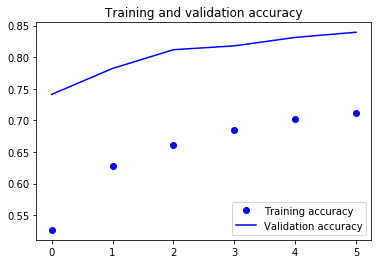

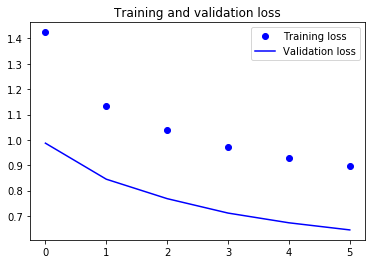

In [23]:
accuracy = sport_train_dropout.history['acc']
val_accuracy = sport_train_dropout.history['val_acc']
loss = sport_train_dropout.history['loss']
val_loss = sport_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [7]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

15392/15426 [============================>.] - ETA: 0sTest loss: 0.653414783281
Test accuracy: 0.836833916764
